In [14]:
import pandas as pd
import numpy as np

In [15]:
#load the dataset
df=pd.read_csv("startup_funding.csv",encoding='utf-8')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


## Checking the attributes of data

In [16]:
#columns names
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [17]:
#no of rows and columns
df.shape

(3044, 10)

In [18]:
#columns with data types and value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


## 2.Data cleaning and Preprocessing

In [19]:
#dropping the columns that are not required
df.drop(['Sr No','Remarks'],axis=1,inplace=True)

In [20]:
df.shape

(3044, 8)

## Check for duplicates,drop if any

In [21]:
df[df['Startup Name'].duplicated()]
#df.drop_duplicates(inplace=True)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
21,18/11/2019,Healthians,Health and Wellness,Healthcare services,Gurgaon,"DG Daiwa Ventures, DG Incubation",Series B,"1,20,00,000"
44,01/08/2019,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"2,00,00,000"
65,01/07/2019,Uniphore,Artificial Intelligence,Speech Recognition,Taramani,March Capital Partners,Series C,"3,80,80,000"
97,31/05/2019,Bira91,Food and Beverage,Brewery,New Delhi,Sixth Sense Ventures,Series B,"56,00,000"
110,17/04/2019,Shuttl,Transportation,Bus Aggregation,Gurugram,New Atlantic Ventures,Venture Round,"50,00,000"
...,...,...,...,...,...,...,...,...
3026,21/01/2015,MyDreamStore,NaN,NaN,NaN,Undisclosed Investors,Seed Funding,"3,25,000"
3028,21/05/2015,Villgro,NaN,NaN,NaN,Michael & Susan Dell Foundation,Seed Funding,"32,50,000"
3034,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"15,00,000"
3037,27/01/2015,CarDekho.com,NaN,NaN,NaN,"Hillhouse Capital, Tybourne Capital",Private Equity,"5,00,00,000"


In [22]:
df[df.duplicated()]

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD


## Handling Null Values

In [23]:
null_df=df.isnull().sum().reset_index()
null_df

,index,0
0,Date dd/mm/yyyy,0
1,Startup Name,0
2,Industry Vertical,171
3,SubVertical,936
4,City Location,180
5,Investors Name,24
6,InvestmentnType,4
7,Amount in USD,960


In [24]:
#checking for null values
null_df=df.isnull().sum().reset_index()
null_df.columns=['Columns','Null value count']
null_df['% of Null values'] =((null_df['Null value count']/len(df))*100).round(1)
null_df

,Columns,Null value count,% of Null values
0,Date dd/mm/yyyy,0,0.0
1,Startup Name,0,0.0
2,Industry Vertical,171,5.6
3,SubVertical,936,30.7
4,City Location,180,5.9
5,Investors Name,24,0.8
6,InvestmentnType,4,0.1
7,Amount in USD,960,31.5


In [25]:
df[df['Industry Vertical'].isnull()]

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
2873,02/03/2015,TrulyMadly.com,NaN,NaN,NaN,"Helion Venture Partners, Kae Capital",Private Equity,"55,00,000"
2874,02/03/2015,InstaLively,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"1,20,000"
2875,03/03/2015,Vserv,NaN,NaN,NaN,"Maverick Capital, IDG Ventures India",Private Equity,"1,50,00,000"
2876,03/03/2015,Intruo.com,NaN,NaN,NaN,"Ashutosh Lawania, Alok Goel & others",Seed Funding,NaN
2877,05/03/2015,Niffler,NaN,NaN,NaN,SAIF Partners,Seed Funding,"10,00,000"
...,...,...,...,...,...,...,...,...
3039,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [26]:
#fill null values with mode or unknown
df['Industry Vertical']=df['Industry Vertical'].fillna('Unknown') 

In [27]:
df['Industry Vertical'].unique().tolist()

['E-Tech',
 'Transportation',
 'E-commerce',
 'FinTech',
 'Fashion and Apparel',
 'Logistics',
 'Hospitality',
 'Technology',
 'E-Commerce',
 'Aerospace',
 'B2B-focused foodtech startup',
 'Finance',
 'Video',
 'Gaming',
 'Software',
 'Health and wellness',
 'Education',
 'Food and Beverage',
 'Health and Wellness',
 'B2B Marketing',
 'Video Games',
 'SaaS',
 'Last Mile Transportation',
 'Healthcare',
 'Customer Service',
 'B2B',
 'Consumer Goods',
 'Advertising, Marketing',
 'IoT',
 'Information Technology',
 'Consumer Technology',
 'Accounting',
 'Retail',
 'Customer Service Platform',
 'Automotive',
 'EdTech',
 'Services',
 'Compliance',
 'Transport',
 'Artificial Intelligence',
 'Tech',
 'Health Care',
 'Luxury Label',
 'Waste Management Service',
 'Deep-Tech',
 'Agriculture',
 'Energy',
 'Digital Media',
 'Saas',
 'Automobile',
 'Agtech',
 'Social Media',
 'Fintech',
 'Edtech',
 'AI',
 'Ecommerce',
 'Nanotechnology',
 'Services Platform',
 'Travel Tech',
 'Online Education',
 'Onl

In [28]:
variation=df[df['Industry Vertical'].str.contains('commerce',case=False,na=False)]['Industry Vertical'].unique()
variation

array(['E-commerce', 'E-Commerce', 'Ecommerce', 'SaaS, Ecommerce',
       'ECommerce', 'eCommerce', 'ecommerce', 'eCommerce returns etailer',
       'ECommerce Website Creation SAAS platform',
       'ECommerce platform solutions', 'B2B eCommerce Marketplace',
       'eCommerce Product Search Engine',
       'Ecommerce Discount & Cashback coupons platform',
       'conversational commerce mobile app',
       'ecommerce related software product platform',
       'Ecommerce Delivery locker services',
       'Artificial Intelligence Ecommerce Chatbot',
       'ECommerce Brands\\\\xe2\\\\x80\\\\x99 Full Service Agency',
       'ECommerce Data Analytics Platform',
       'Content-based Subscription eCommerce platform',
       'E-Commerce & M-Commerce platform',
       'Ecommerce Product recommendation platform',
       'Ecommerce Marketplace', 'ECommerce Logistics provider',
       'Car & Bike ecommerce platform', 'Hyper-Local Ecommerce',
       'Ecommerce Marketing Software Platform',
    

## Column has Ecommerce values typed in different formats,need to combine them all

In [29]:
#  Replace all the variations with a single value
df['Industry Vertical'] = df['Industry Vertical'].replace(variation, value='E-Commerce', regex=True)

In [30]:
# Similarly replace few other values 
df['Industry Vertical'] = df['Industry Vertical'].replace(['Education', 'Ed-Tech'], value='Ed-Tech', regex=True)
df['Industry Vertical'] = df['Industry Vertical'].replace(['Finance', 'Fin-Tech', 'FinTech'], value='FinTech', regex=True)

## sub vertical

In [32]:
print(list(df['SubVertical'].unique())[:50])
df['SubVertical'].nunique()

['E-learning', 'App based shuttle service', 'Retailer of baby and toddler products', 'Online Investment', 'Embroiled Clothes For Women', 'Open-market, freight management platform', 'Online Food Delivery Platform', 'Agritech', 'Automobile', 'Satellite Communication', 'Logistics Services and Solutions', 'Food Solutions For Corporate', 'Online Meat And Seafood Ordering Startup', 'Non-Banking Financial Company', 'Experience Discovery Platform', 'Real money based gaming startup', 'Online Eyewear Shopping Portal', 'Business and customer engagement tools', "Men's Health and Wellness brand", 'Elearning', 'Indian Burger Brand', 'Healthcare services', 'Financial Services To MSMEs', 'Social gaming platform', 'Recovery software', 'Electric bike rental', 'Virtual e-commerce platform', 'B2B platform for medical supplies', 'Scooter sharing app', 'Music Education', 'Mobile Wallet', 'Delivery Service', 'Business development', 'Beauty and Grooming', 'Financial Services', 'Invoice discounting platform an

1942

In [33]:
variations = []
variations.extend(df[df['SubVertical'].str.contains('online lending platform', case=False, na=False)]['SubVertical'].unique())
variations.extend(df[df['SubVertical'].str.contains('online lending', case=False, na=False)]['SubVertical'].unique())
variations = np.unique(variations)
print(variations)

# Replace all the variations with a single value
df['SubVertical'] = df['SubVertical'].replace(variations, value='Online Lending Platform', regex=True)

['Online Lending' 'Online Lending MarketPlace' 'Online Lending Platform'
 'Online Lending Platform For SME'
 'Online Lending Platform For Salaried Professionals'
 'Online Lending Platform for SME' 'Online Lending mobile app'
 'Online Lending platform' 'Online lending Platform'
 'Online lending platform' 'online lending platform']


In [34]:
# Fill the nulls with Unknown
df['SubVertical'] = df['SubVertical'].fillna('Unknown')

## Investor name

In [35]:
df['Investors Name'].nunique()

2412

In [36]:
# Fill null with Unknown
df['Investors Name'] = df['Investors Name'].fillna('Unknown')

# Note:
    * The null values of columns Industry Vertical, SubVertical and Investors Name are handled.
    * Data type conversion of the columns is not allowed with  the presence of Nan values and hence may cause errors or inconsistencies.

In [37]:
#checking for null values
null_df=df.isnull().sum().reset_index()
null_df.columns=['Columns','Null value count']
null_df['% Of Null values']=((null_df['Null value count']/len(df))*100).round(1)
null_df

,Columns,Null value count,% Of Null values
0,Date dd/mm/yyyy,0,0.0
1,Startup Name,0,0.0
2,Industry Vertical,0,0.0
3,SubVertical,0,0.0
4,City Location,180,5.9
5,Investors Name,0,0.0
6,InvestmentnType,4,0.1
7,Amount in USD,960,31.5


# city location

In [38]:
df['City  Location'].value_counts()[:5]

City  Location
Bangalore    700
Mumbai       567
New Delhi    421
Gurgaon      287
Bengaluru    141
Name: count, dtype: int64

In [39]:
df['City  Location'] =  df['City  Location'].replace(np.nan, df['City  Location'].mode()[0])

In [40]:
df['City  Location'].value_counts()

City  Location
Bangalore                 880
Mumbai                    567
New Delhi                 421
Gurgaon                   287
Bengaluru                 141
                         ... 
India / US                  1
\\xc2\\xa0Bangalore         1
\\xc2\\xa0Mumbai            1
New Delhi / California      1
Dallas / Hyderabad          1
Name: count, Length: 112, dtype: int64

# Investment type

In [41]:
# Renaming the column
df.rename(columns = {'InvestmentnType':'Investment Type'}, inplace=True)

In [42]:
df[df['Investment Type'].isna()].shape[0]

4

In [43]:
df['Investment Type'].value_counts()[:5]

Investment Type
Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Name: count, dtype: int64

In [44]:
df['Investment Type'] = df['Investment Type'].replace(np.nan, df['Investment Type'].mode()[0])

In [45]:
# check for any null values
df.isnull().sum()

Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         0
Investors Name         0
Investment Type        0
Amount in USD        960
dtype: int64

# amount in usd

In [46]:
print('Null values in Amount in USD',  df[df['Amount in USD'].isna()].shape)

Null values in Amount in USD (960, 8)


In [47]:
df.dropna(subset=['Amount in USD'], inplace=True)

In [48]:
df.isnull().sum()

Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
Investment Type      0
Amount in USD        0
dtype: int64

In [49]:
print(df['Amount in USD'].unique().tolist(), end = ' ')

['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000', '18,00,000', '90,00,000', '15,00,00,000', '60,00,000', '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000', '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000', '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000', '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000', '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000', '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000', '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000', '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000', '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000', '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000', 'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000', '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605', '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.00', '4,30,200', '1,55,00,000', '5,20,00,000', '35,84,000', '34,00,000', '8,68,600', '1,15,00,000', '56,0

In [50]:
df['Amount in USD'] = df['Amount in USD'].str.lower().replace( ['unknown', 'undisclosed'], np.nan)
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '', regex=False)

In [51]:
df.dropna(subset = 'Amount in USD', inplace=True)

In [52]:
df.isnull().sum()

Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
Investment Type      0
Amount in USD        0
dtype: int64

# Data type conversions

# Date dd/mm/yyyy

In [53]:
df.rename(mapper = {'Date dd/mm/yyyy':'Date'}, inplace =True, axis=1) # columns = {'Date dd/mm/yyyy':'Date'}
df.head(2)

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394


In [54]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y", errors='coerce') # dayfirst=True, format = 'mixed'

In [55]:
df['Date'].isna().sum()

np.int64(7)

In [56]:
df.dropna(subset=['Date'], inplace=True)

# Amount in USD

In [57]:
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

In [58]:
df.isnull().sum()

Date                  0
Startup Name          0
Industry Vertical     0
SubVertical           0
City  Location        0
Investors Name        0
Investment Type       0
Amount in USD        11
dtype: int64

In [59]:
# check for dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2070 non-null   datetime64[ns]
 1   Startup Name       2070 non-null   object        
 2   Industry Vertical  2070 non-null   object        
 3   SubVertical        2070 non-null   object        
 4   City  Location     2070 non-null   object        
 5   Investors Name     2070 non-null   object        
 6   Investment Type    2070 non-null   object        
 7   Amount in USD      2059 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 145.5+ KB


# EDA - Exploratory Data Analysis

# Statistical Five Point summary

In [60]:
df.describe(include='number')  # 'all'

,Amount in USD
count,2.059000e+03
mean,1.847863e+07
std,1.215468e+08
min,1.600000e+04
25%,4.700000e+05
50%,1.750000e+06
75%,8.000000e+06
max,3.900000e+09


Min Fund Amount: 
50% of Fund Amount: 
75% of Fund Amount: 
Max Fund Amount: 
Note: Max fund amount is much higher than 75 percentile of the fund amounts showing a large right skewed distribution


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2070 non-null   datetime64[ns]
 1   Startup Name       2070 non-null   object        
 2   Industry Vertical  2070 non-null   object        
 3   SubVertical        2070 non-null   object        
 4   City  Location     2070 non-null   object        
 5   Investors Name     2070 non-null   object        
 6   Investment Type    2070 non-null   object        
 7   Amount in USD      2059 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 145.5+ KB


In [62]:
df.describe(include='object')

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type
count,2070,2070,2070,2070,2070,2070
unique,1700,580,1307,91,1666,50
top,Swiggy,Consumer Internet,Unknown,Bangalore,Undisclosed Investors,Private Equity
freq,8,588,652,590,29,1073


In [ ]:
Statistical Summary:-

* Total count of values: 2059
* Cleaned dataset contains 1691 different startups
* Consumer Internet is the Vertical and City wise, Bangalore is highest frequency to recieve invesment funds
* Most of the investments are of type Private Equity

# Univariate Analysis

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

### Categorical columns

### Top sectors

Industry Vertical
Consumer Internet    588
Technology           310
E-Commerce           209
Unknown              129
FinTech               72
Healthcare            44
Ed-Tech               31
Logistics             23
Food & Beverage       15
IT                     8
Name: count, dtype: int64


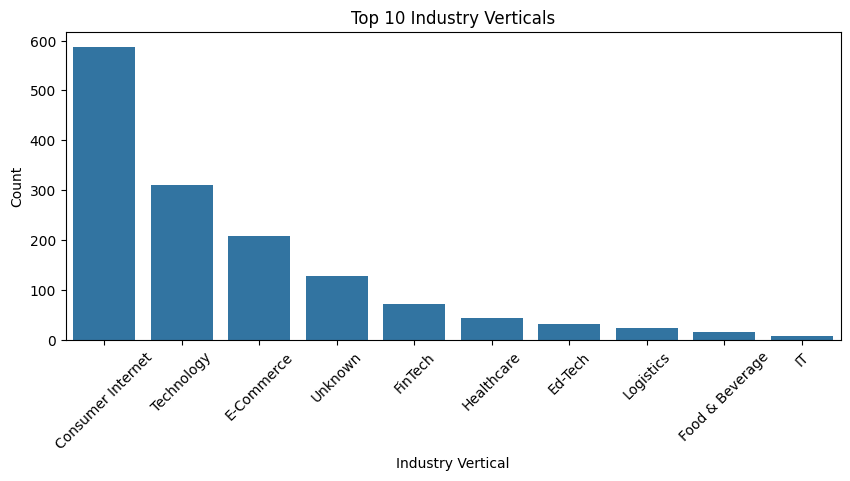

In [87]:
# Count plots for top 10 categories of 'Industry Vertical'

plt.figure(figsize=(10, 4))
top_categories = df['Industry Vertical'].value_counts().head(10)
print(top_categories)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title(f'Top 10 Industry Verticals')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

* Consumer Internet is the Vertical recieving highest Investment in this dataset
* Followed by Technology and Ecommerce etc.
* Dataset significan t count of values where the area of Investment is missing.
* Domains like HealthCare, Education and Logistics are recievign relatively much less investments


SubVertical
Unknown                             652
Online Lending Platform              11
Online Lending Platform Platform     11
Education                             5
Online Pharmacy                       5
Online Learning Platform              4
Food Delivery Platform                4
Online Education Platform             4
Online Food Delivery                  4
Non-Banking Financial Company         4
Name: count, dtype: int64


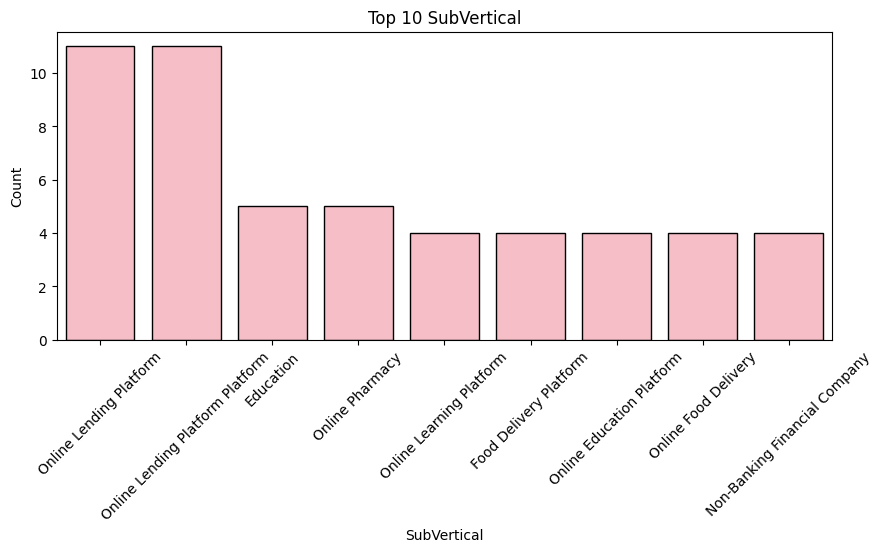

In [65]:
plt.figure(figsize=(10, 4))
top_categories = df['SubVertical'].value_counts().head(10)
print(top_categories)
sns.barplot(x=top_categories.index[1:], y=top_categories.values[1:], color = 'lightpink', edgecolor='black')
plt.title(f'Top 10 SubVertical')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

##### Online Lending Platform Pharmacy followed by Education and Food delivery Platforms are the Subverticals that have the highest funding.

##### Top Cities

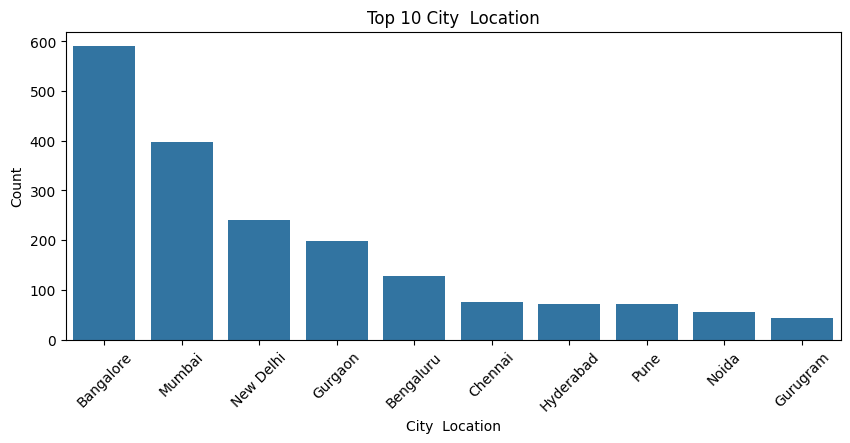

In [66]:
# Count plots for top 10 categories

plt.figure(figsize=(10, 4))
top_categories = df['City  Location'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title(f'Top 10 City  Location')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

* Metro cities like Bangalore, Mumbai and New Delhi are the locations recieving highest funds with the startup hub Bangalore having the highest count
* Hyderabad, Chennai and Noida all 3 have similar funding counts

##### Top Investors

Investors Name
Undisclosed Investors       29
Undisclosed investors       24
Unknown                     20
Kalaari Capital             13
Sequoia Capital             13
Group of Angel Investors    13
Indian Angel Network        11
undisclosed investors       11
SAIF Partners               10
Undisclosed Investor        10
Name: count, dtype: int64


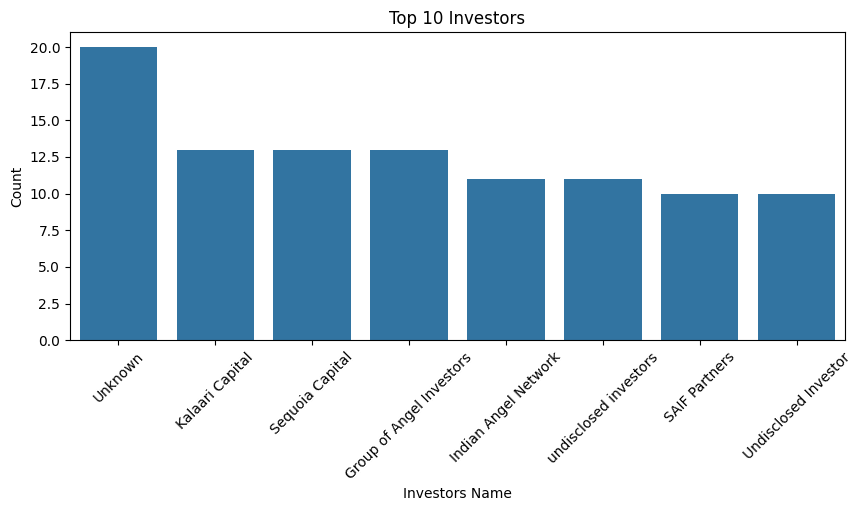

In [67]:
# Count plots for top 10 categories

plt.figure(figsize=(10, 4))
top_categories = df['Investors Name'].value_counts().head(10)
print(top_categories)
sns.barplot(x=top_categories.index[2:], y=top_categories.values[2:])
plt.title(f'Top 10 Investors')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Most of the investor details is not disclosed in the public domain
Out of those publiashed, Angel Investors / Network are the top Investors followed by Sequoia Capital and Kalaari Capital

#### Popular Investment Type

Investment Type
Private Equity          1073
Seed Funding             716
Seed/ Angel Funding       48
Seed / Angel Funding      38
Debt Funding              24
Series A                  22
Seed\\nFunding            22
Series B                  20
Seed/Angel Funding        18
Series C                  14
Name: count, dtype: int64


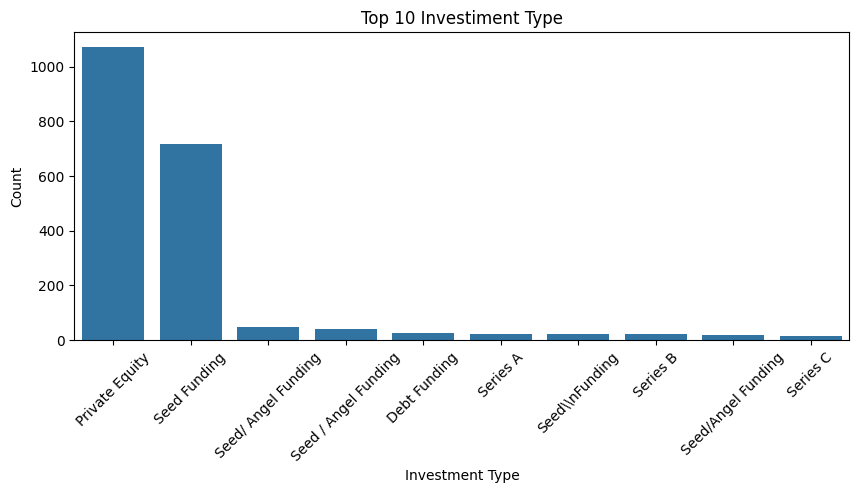

In [68]:
# Count plots for top 10 categories

plt.figure(figsize=(10, 4))
top_categories = df['Investment Type'].value_counts().head(10)
print(top_categories)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title(f'Top 10 Investiment Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


* private equity is the highest Investment Type in this bar plot.

##### Top Startups

Startup Name
Swiggy           8
Ola Cabs         7
Capital Float    5
UrbanClap        5
Flipkart         5
Paytm            5
Grofers          5
Toppr            5
Medinfi          5
Nykaa            5
Name: count, dtype: int64


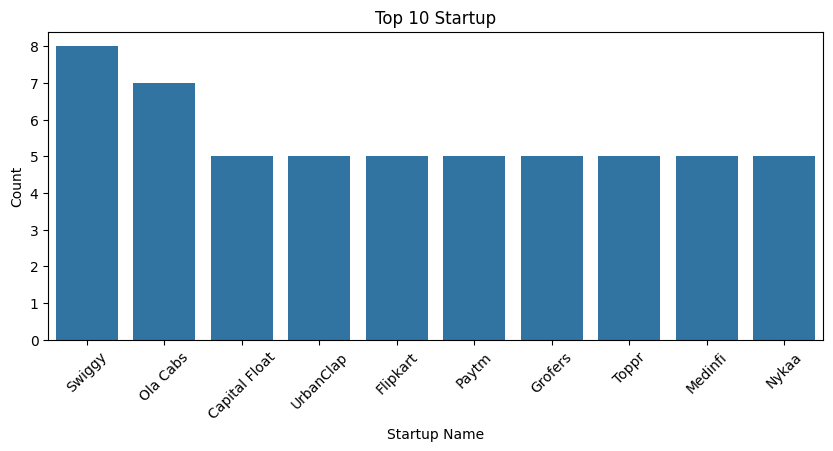

In [69]:
# Count plots for top 10 categories

plt.figure(figsize=(10, 4))
top_categories = df['Startup Name'].value_counts().head(10)
print(top_categories)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title(f'Top 10 Startup')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

 * Swiggy and Ola has occured most in the dataset

# For Numerical: Amount in USD

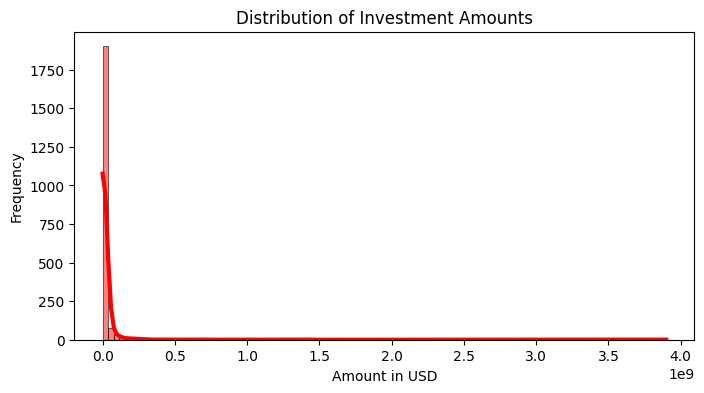

In [71]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount in USD'], kde=True, color='r', bins=100,  line_kws={'linewidth': 3}) 
plt.title('Distribution of Investment Amounts')
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()

#### Interpretation

X-axis (Amount in USD): Range of investment amounts (from very low to nearly $4 billion).
Y-axis (Frequency): Number of investments in each amount range.

* A sharp spike near $0 — indicating most investments are small.

* Long tail to the right — a few extremely large investments (outliers).

* Highly skewed distribution (right-skewed)

# Bivariate / Multivariate Analysis

#### Numerical–Numerical

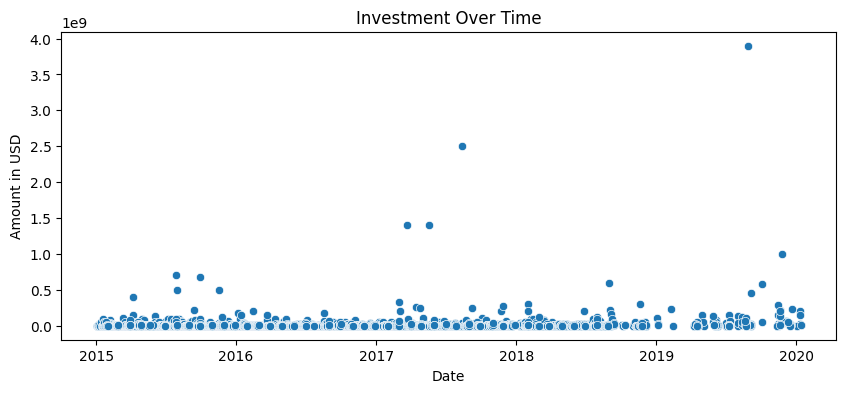

In [72]:
#  Funding Trends over time
# Scatter Plot (Date vs. Amount)
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='Date', y='Amount in USD')
plt.title('Investment Over Time')
plt.show()

* Investment amounts have consistently increased over the years from 2015 to 2020

### Categorical–Numerical

### Box Plot

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2070 non-null   datetime64[ns]
 1   Startup Name       2070 non-null   object        
 2   Industry Vertical  2070 non-null   object        
 3   SubVertical        2070 non-null   object        
 4   City  Location     2070 non-null   object        
 5   Investors Name     2070 non-null   object        
 6   Investment Type    2070 non-null   object        
 7   Amount in USD      2059 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 145.5+ KB


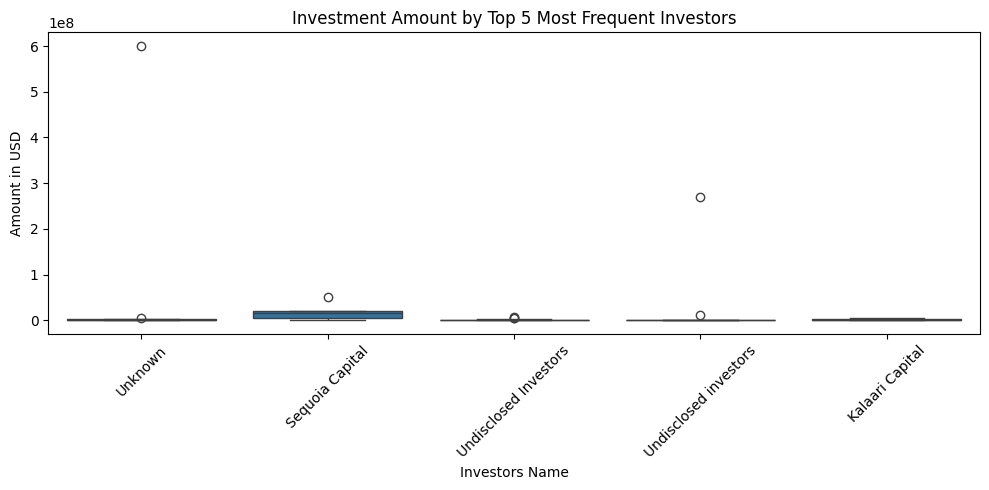

In [74]:
# Get top 5 Industry Verticals by count
top5 = df['Investors Name'].value_counts().nlargest(5).index

# Filter the DataFrame
filtered_df = df[df['Investors Name'].isin(top5)]

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='Investors Name', y='Amount in USD')
plt.xticks(rotation=45)
plt.title('Investment Amount by Top 5 Most Frequent Investors')
plt.tight_layout()
plt.show()


### Inference:
* sequoia capital is most frequent investor among all.

### Violin Plot

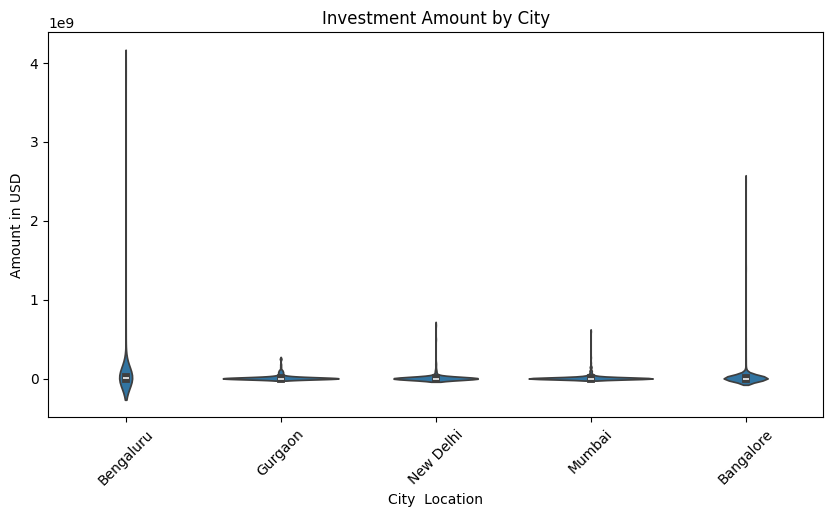

In [75]:
# City that recieves highest Investment Funds in violin plot
top5 = df['City  Location'].value_counts().nlargest(5).index
filtered_df = df[df['City  Location'].isin(top5)]

plt.figure(figsize=(10, 5))
sns.violinplot(data=filtered_df, x='City  Location', y='Amount in USD')
plt.xticks(rotation=45)
plt.title('Investment Amount by City')
plt.show()

### Inference:
* Bengaluru receives the highest and most consistent investment amounts among all cities, making it the leading destination for startup funding.

### Group by

In [76]:
# Group by aggregation
df.groupby('Industry Vertical')['Amount in USD'].mean().sort_values(ascending=False).head(10)

Industry Vertical
Transportation                        979158098.5
Car Aggregator & Retail Mobile App    500000000.0
E-Commerce Marketplace                500000000.0
Cab Aggregator                        400000000.0
Online Marketplace                    350071500.0
Automation                            300000000.0
B2B                                   293500000.0
Cab rental Mobile app                 225000000.0
B2B Platform                          225000000.0
E-Tech                                200000000.0
Name: Amount in USD, dtype: float64

### Transportation 

## Categorical–Categorical
## Crosstab + Stacked Bar

## Ivestment Type across Cities

In [77]:
# top_categories = ct.sum().nlargest(5).index
# ax = ct[top_categories].plot(kind='bar', stacked=True, figsize=(12, 6))

ct = pd.crosstab(df['City  Location'], df['Investment Type'])
ct = ct[ct.sum(axis=1) > 20]  # filter for readability
ct

Investment Type,Angel,Angel / Seed Funding,Angel Round,Corporate Round,Crowd Funding,Crowd funding,Debt,Debt Funding,Debt and Preference capital,Debt-Funding,...,Series G,Series H,Series J,Single Venture,Structured Debt,Term Loan,Venture - Series Unknown,Venture Round,pre-Series A,pre-series A
City Location,,,,,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Bangalore,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bengaluru,0,2,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,1,0,1,0
Chennai,0,1,0,0,0,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
Delhi,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Gurgaon,0,1,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,0
Gurugram,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,1,0,1,0,0
Hyderabad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Mumbai,0,0,0,0,0,0,0,5,1,0,...,0,0,0,1,1,0,0,0,0,0


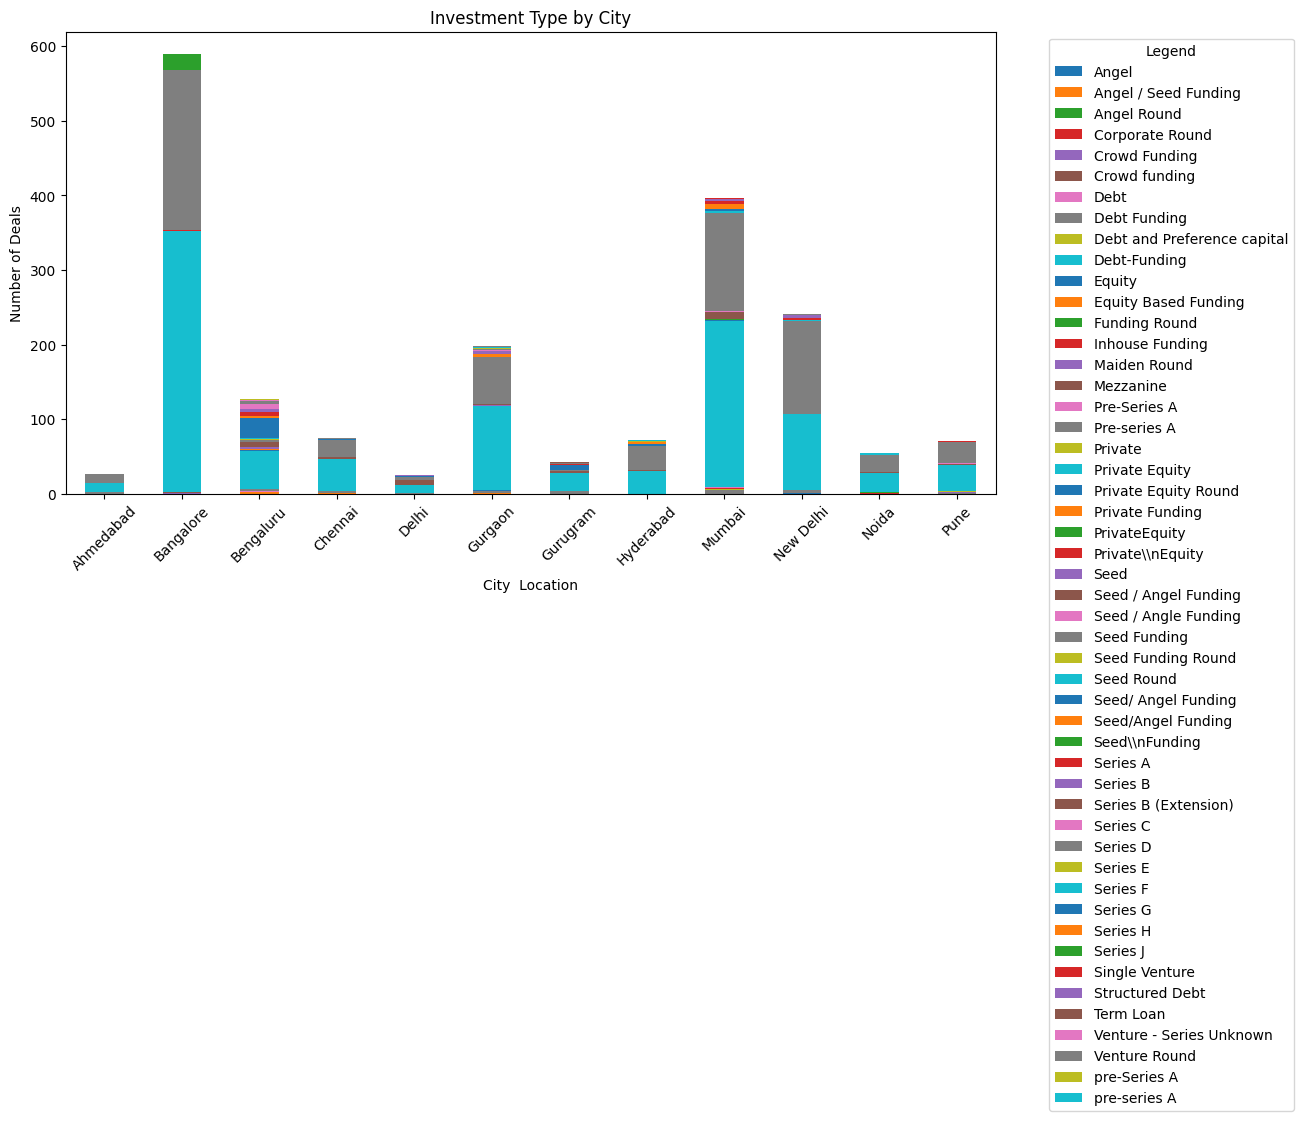

In [78]:
ct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
# plt.tight_layout()  # Adjust layout to fit everything
plt.title('Investment Type by City')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.show()

### Inference:
* Bangalore and Mumbai lead in the number of funding deals, making them the top startup investment hubs among Indian cities.

## Funding Trends Over Time

     YearMonth  Amount in USD
0   2015-01-02      2465000.0
1   2015-01-05     10515000.0
2   2015-01-06     11885000.0
3   2015-01-07      5155768.0
4   2015-01-09     13000000.0
..         ...            ...
924 2019-12-20    231000000.0
925 2020-01-02      4800000.0
926 2020-01-09    218358860.0
927 2020-01-10    150000000.0
928 2020-01-13     17048394.0

[929 rows x 2 columns]


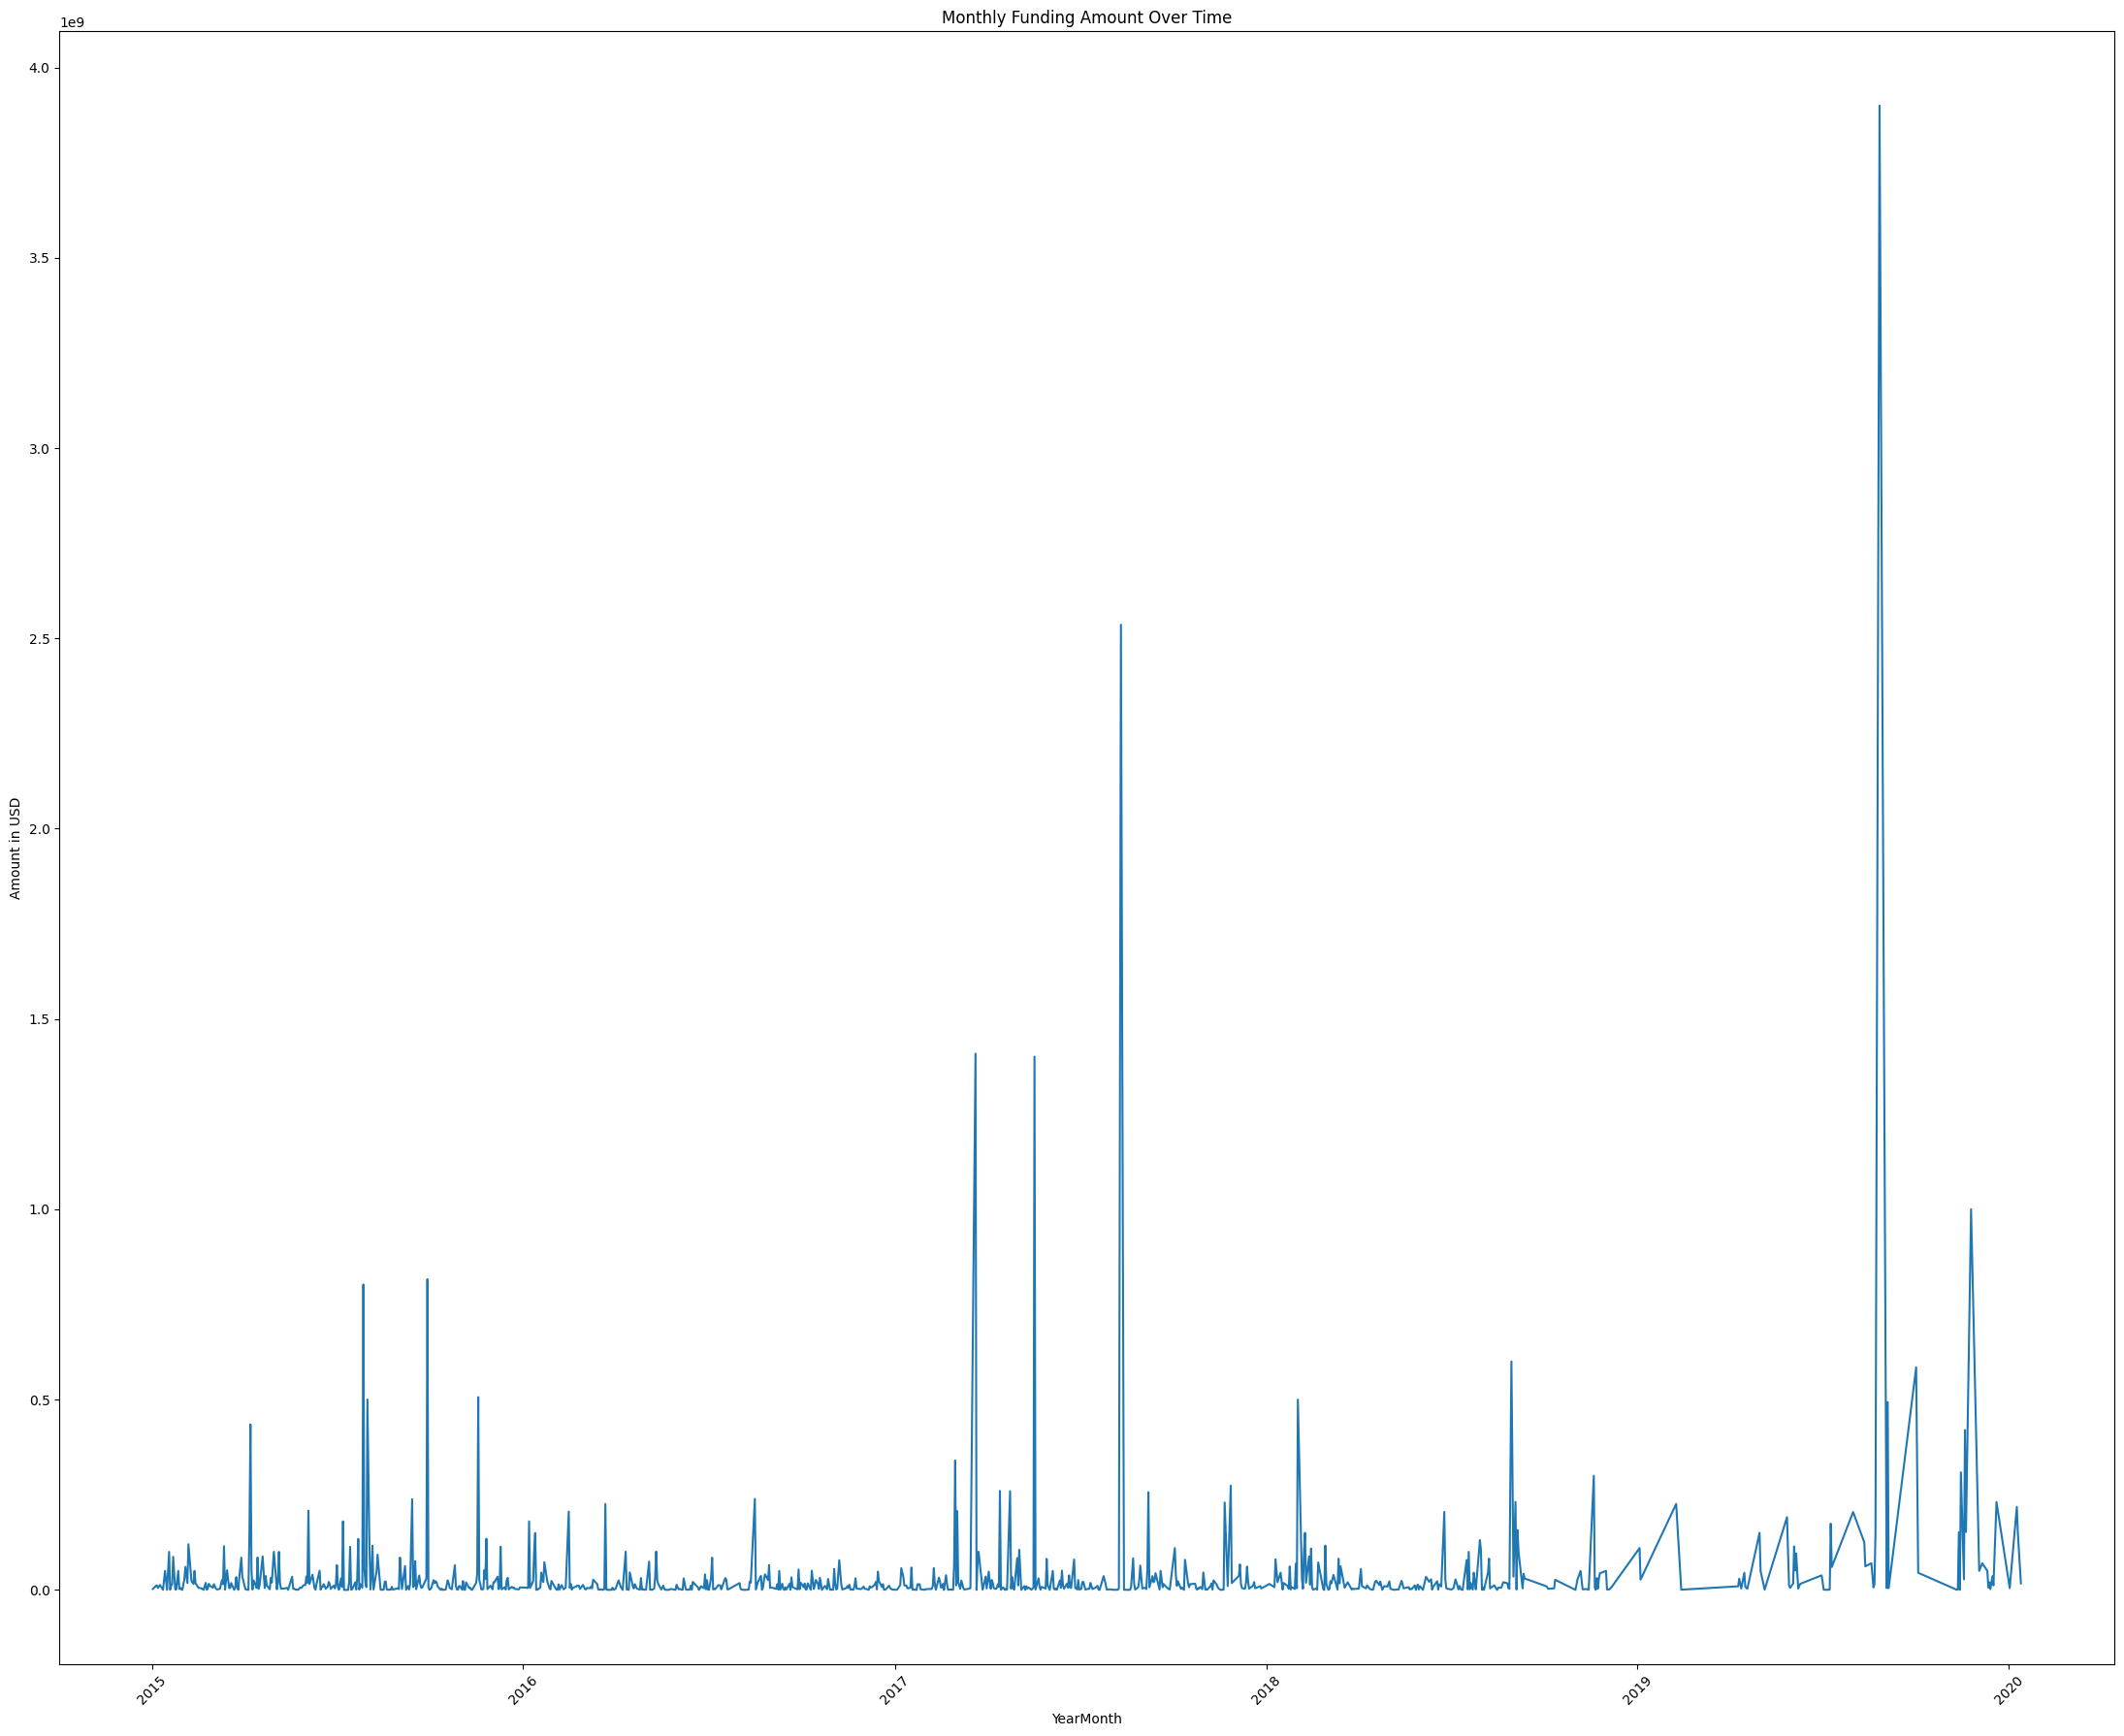

In [113]:
df['YearMonth'] = df['Date']#.dt.to_period('M')
monthly_funding = df.groupby('YearMonth')['Amount in USD'].sum().reset_index()
print(monthly_funding)
plt.figure(figsize=(22, 18))
sns.lineplot(data=monthly_funding, x='YearMonth', y='Amount in USD')
plt.title("Monthly Funding Amount Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* Funding amounts have fluctuated significantly over time, indicating varying investor activity and changing market conditions month to month.

### Top Sectors

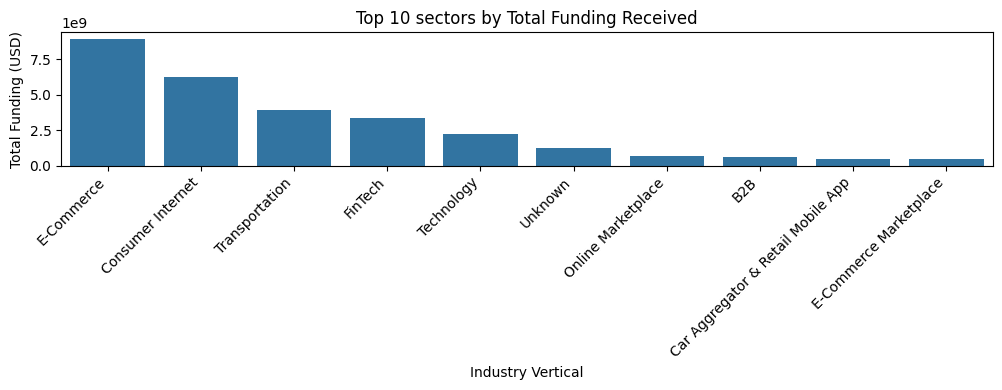

In [79]:
# Group by Startup Name and sum the funding amounts
top_funded = df.groupby('Industry Vertical')['Amount in USD'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=top_funded.index, y=top_funded.values)
plt.title('Top 10 sectors by Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
plt.show()


#### Top Cities

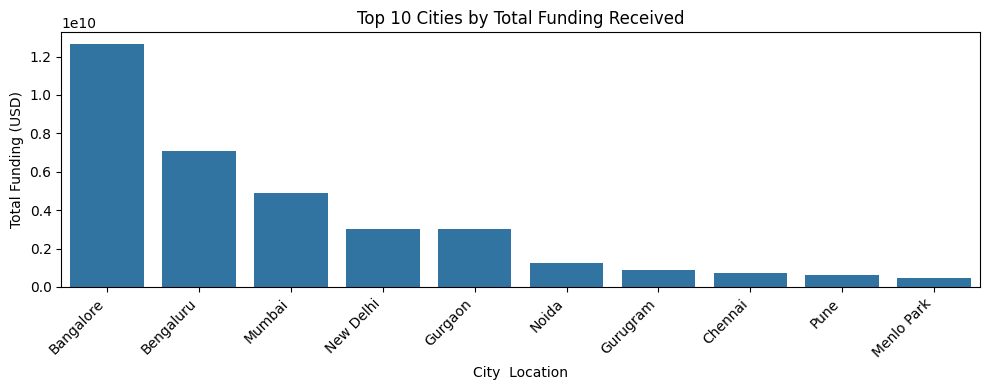

In [80]:
# Group by Startup Name and sum the funding amounts
top_funded = df.groupby('City  Location')['Amount in USD'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=top_funded.index, y=top_funded.values)
plt.title('Top 10 Cities by Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
plt.show()


#### Top startups to recieve highest funds

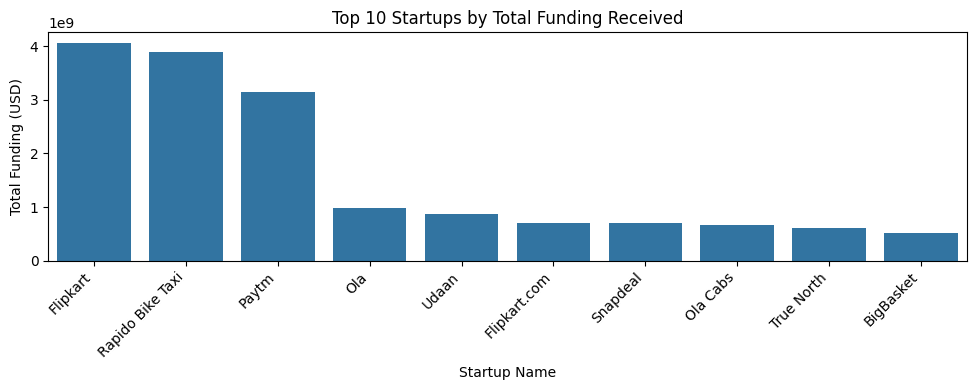

In [81]:
# Group by Startup Name and sum the funding amounts
top_funded = df.groupby('Startup Name')['Amount in USD'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=top_funded.index, y=top_funded.values)
plt.title('Top 10 Startups by Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
plt.show()

* flipkart and rapido bike taxi recieved highest fund in 2015-2020

### Active Investors

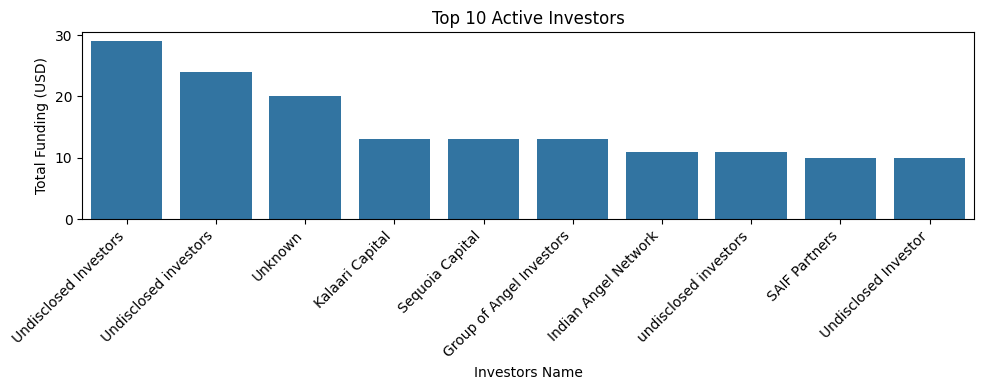

In [88]:
# Group by Startup Name and sum the funding amounts
# top_funded = df.groupby('Investors Name')['Amount in USD'].sum().nlargest(10)
top_funded = df['Investors Name'].value_counts()[:10]
# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=top_funded.index, y=top_funded.values)
plt.title('Top 10 Active Investors')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
plt.show()


* Undisclosed and unknown investors contribute the most funding, while known firms like Kalaari Capital and Sequoia Capital are among the top active investors.

## Investment Type Distributions


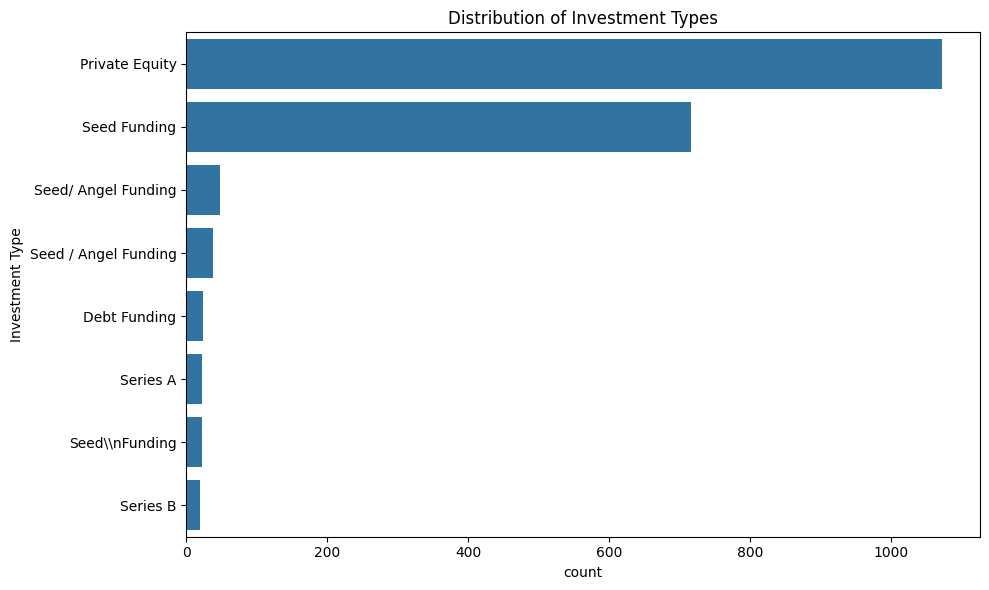

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Investment Type', order=df['Investment Type'].value_counts()[:8].index)
plt.title("Distribution of Investment Types")
plt.tight_layout()
plt.show()


* Private Equity and Seed Funding are the most common investment types, indicating a strong focus on early and growth-stage startup investments.

## Conclusions

 ##### Top sectors
* Consumer Internet is the Vertical recieving highest Investment in this dataset
* Followed by Technology and Ecommerce etc.
* Dataset significan t count of values where the area of Investment is missing.
* Domains like HealthCare, Education and Logistics are recievign relatively much less investments
* Online Lending Platform Pharmacy followed by Education and Food delivery Platforms are the Subverticals that have the highest funding.
 ##### Top Cities
* Metro cities like Bangalore, Mumbai and New Delhi are the locations recieving highest funds with the startup hub Bangalore having the highest count
 ##### Top Investors
* Most of the investor details is not disclosed in the public domain
* Out of those publiashed, Angel Investors / Network are the top Investors followed by Sequoia Capital and Kalaari Capital


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2070 non-null   datetime64[ns]
 1   Startup Name       2070 non-null   object        
 2   Industry Vertical  2070 non-null   object        
 3   SubVertical        2070 non-null   object        
 4   City  Location     2070 non-null   object        
 5   Investors Name     2070 non-null   object        
 6   Investment Type    2070 non-null   object        
 7   Amount in USD      2059 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 145.5+ KB


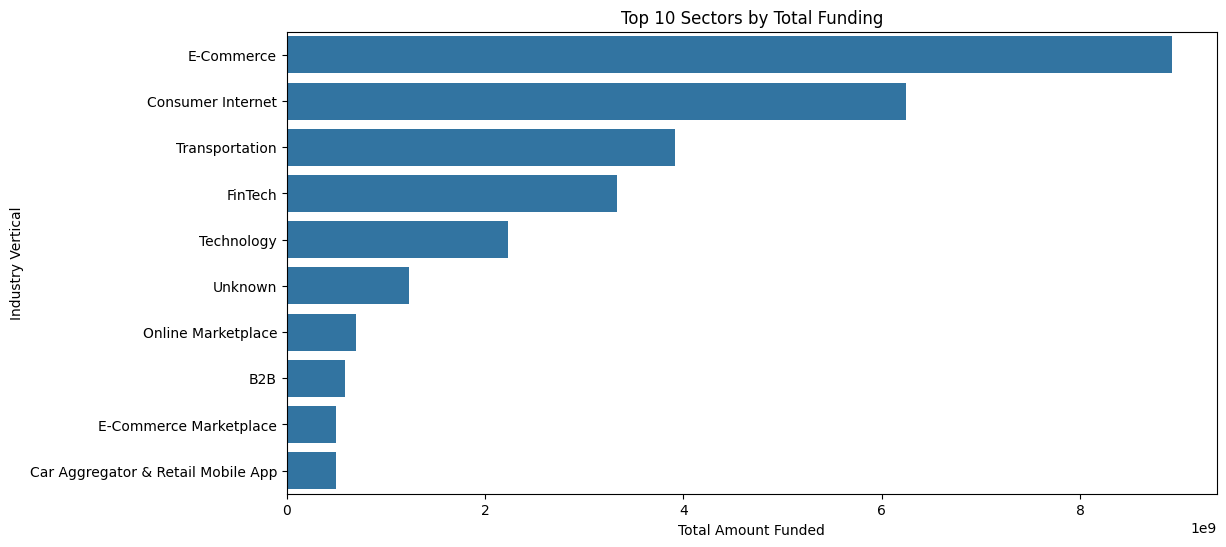

In [85]:
# Sector vs Amount
plt.figure(figsize=(12, 6))
top_industries = df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top 10 Sectors by Total Funding")
plt.xlabel("Total Amount Funded")
plt.show()


### 💼 For Investors:

* Focus on rapidly growing sectors like FinTech, EdTech, and HealthTech.
* Major cities like Bangalore, Mumbai, and Delhi are startup hubs worth concentrating investments.

### 🚀 For Startup Founders:
* High funding observed in early stages — focus on building MVPs and initial traction.
* Cities with vibrant investor communities (like Bangalore) offer networking and pitching opportunities.

### 📊 Data-Driven Advice:
* Tailor pitches with sector-specific growth data.
* Leverage popular investment types like Seed Funding and Series A

### Active Investores:
* Undisclosed and unknown investors contribute the most funding, while known firms like Kalaari Capital and Sequoia Capital are among the top active investors.

### Investment type distributions 
* Private Equity and Seed Funding are the most common investment types, indicating a strong focus on early and growth-stage startup investments.

### Top startups to recieve highest funds
* flipkart and rapido bike taxi recieved highest fund in 2015-2020

### Funding Trends Over Time
* Funding amounts have fluctuated significantly over time, indicating varying investor activity and changing market conditions month to month.